## 1.Title

#  Distribution Analysis of Age and Gender in Employee Population

## 2.Table of Contents
#### 1.Title

#### 2.Table of Contents

#### 3.Problem Statement

#### 4.Objective

#### 5.Importing necessary libraries

#### 6.Data Collection

#### 7.Data Description

#### 8.EDA (Exploratory Data Analysis)

#### 9.Visualization

#### 10.Feature Engineering

#### 11.Data Splitting

#### 12.Model Selection,Model Training & Model Evaluation

#### 13.Result

#### 14.Conclusion

## 3.Problem Statement

##### Organizations often need to understand the composition of their workforce to make informed decisions about talent management, diversity, and planning. However, raw employee data alone does not provide clear insights. Without proper visualization, it can be challenging to identify trends, imbalances, or areas of focus, such as age distribution or gender representation within the organization.



## 4.Objective

##### The objective of this task is to visualize the distribution of key demographic variables specifically age (a continuous variable) and gender (a categorical variable) within the employee dataset. By using histograms and bar charts, the goal is to provide intuitive and actionable insights into the population structure, aiding in workforce analysis and strategic HR decision-making.

## 5.Importing necessary libraries


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

##  6.Data Collection

In [3]:
# Load the dataset
file_path = 'Employee.csv'
df = pd.read_csv(file_path)


In [4]:
# Displaying the first few rows
print('First 5 rows of the dataset:')
df.head()

First 5 rows of the dataset:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## 7.Data Description


In [5]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(4653, 9)


##  8.EDA (Exploratory Data Analysis)

In [6]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [7]:
# Selecting all numerical columns (both float and int types)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')


In [8]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


In [9]:
# Displaying basic information about the dataset
print('\nDataset Information:')
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:

# Displaying basic information about the dataset
print('\nDataset Information:')
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [11]:
# Checking for missing values
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [12]:
# Descriptive statistics
print('\nDescriptive Statistics (Numerical):')
df.describe()


Descriptive Statistics (Numerical):


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
# Descriptive statistics for categorical variables
print('\nDescriptive Statistics (Categorical):')
df.describe(include=['object'])



Descriptive Statistics (Categorical):


,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


## 9.Visualization

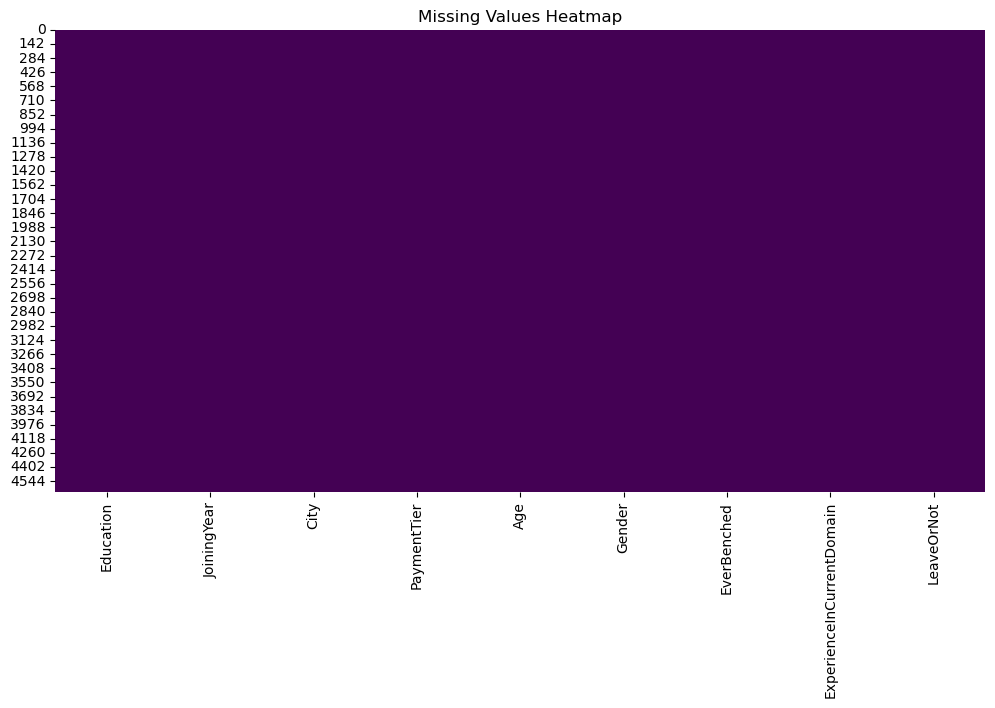

In [14]:
# Visualizing Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

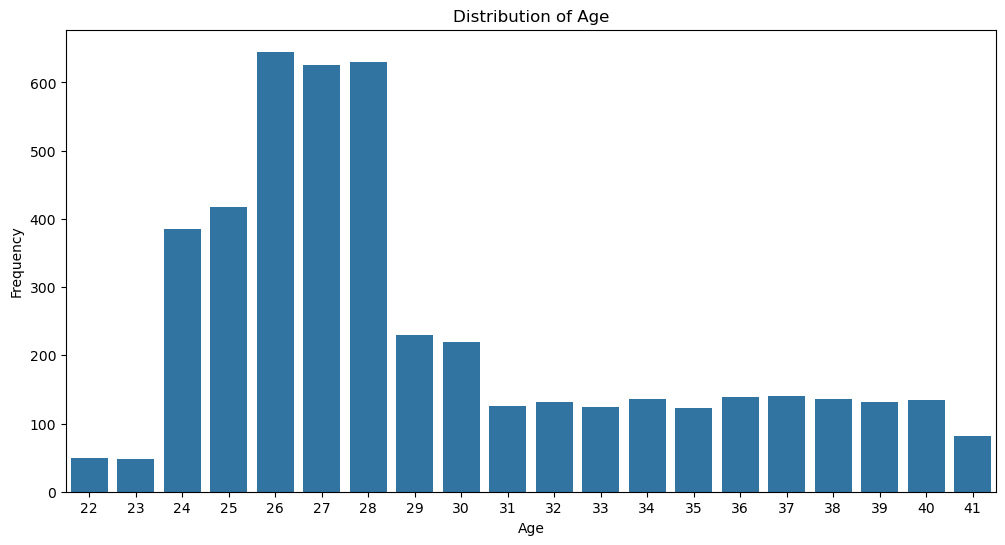

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Age', data = df)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

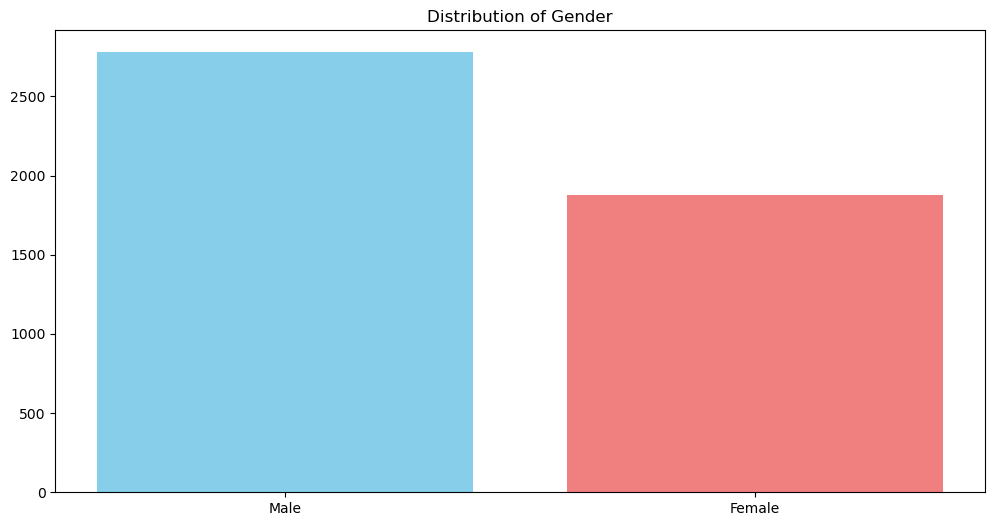

In [16]:
# Distribution of Gender (Bar Chart)
plt.figure(figsize=(12,6))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()


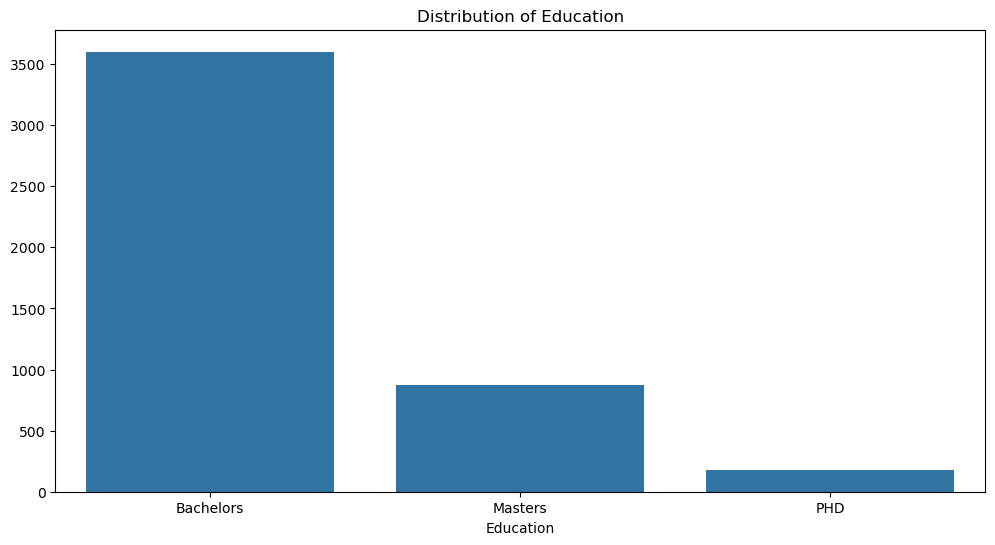

In [17]:
# Distribution of Education
plt.figure(figsize=(12,6))
education_counts = df['Education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Distribution of Education')
plt.show()

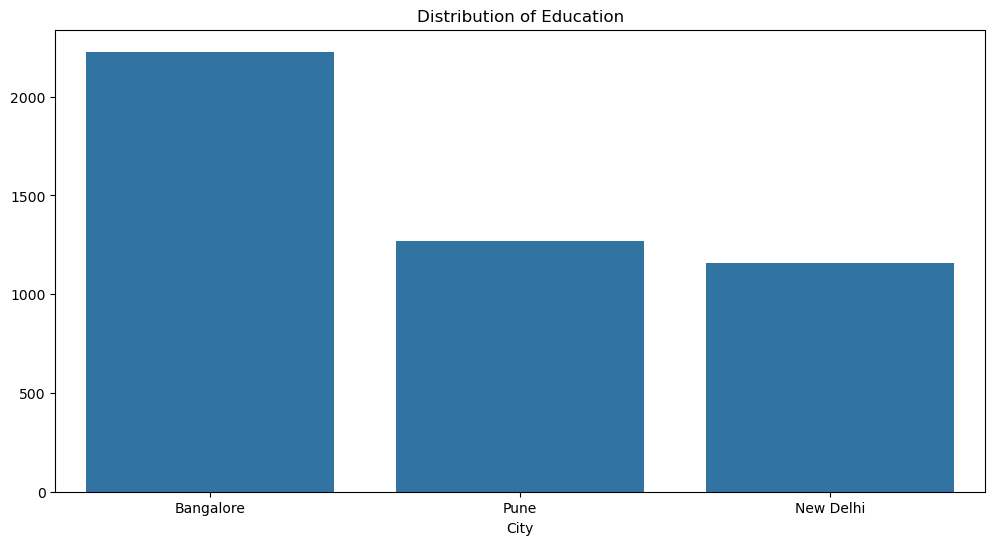

In [18]:
# Distribution of Education
plt.figure(figsize=(12,6))
education_counts = df['City'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Distribution of Education')
plt.show()

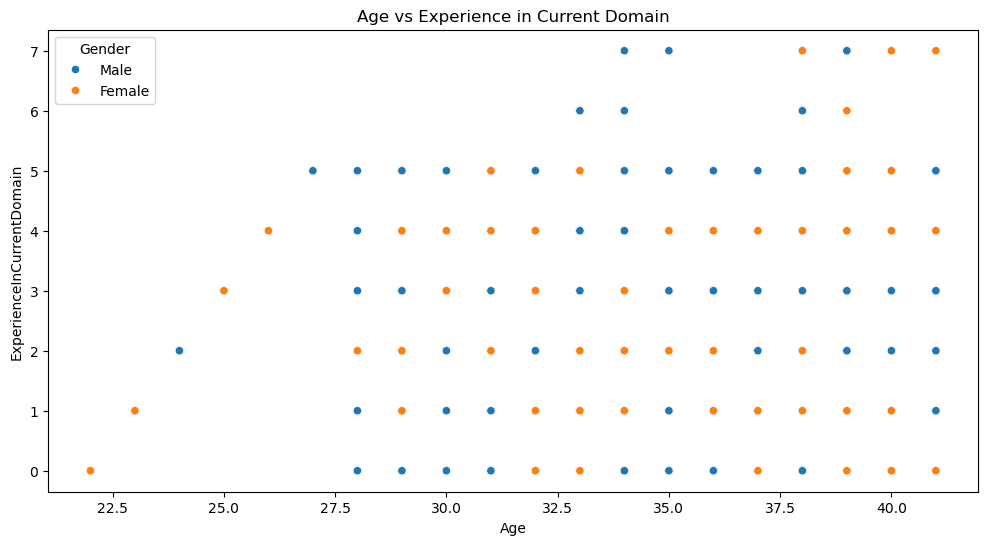

In [19]:
# Scatter Plot - Age vs Experience
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='ExperienceInCurrentDomain', data=df, hue='Gender')
plt.title('Age vs Experience in Current Domain')
plt.show()

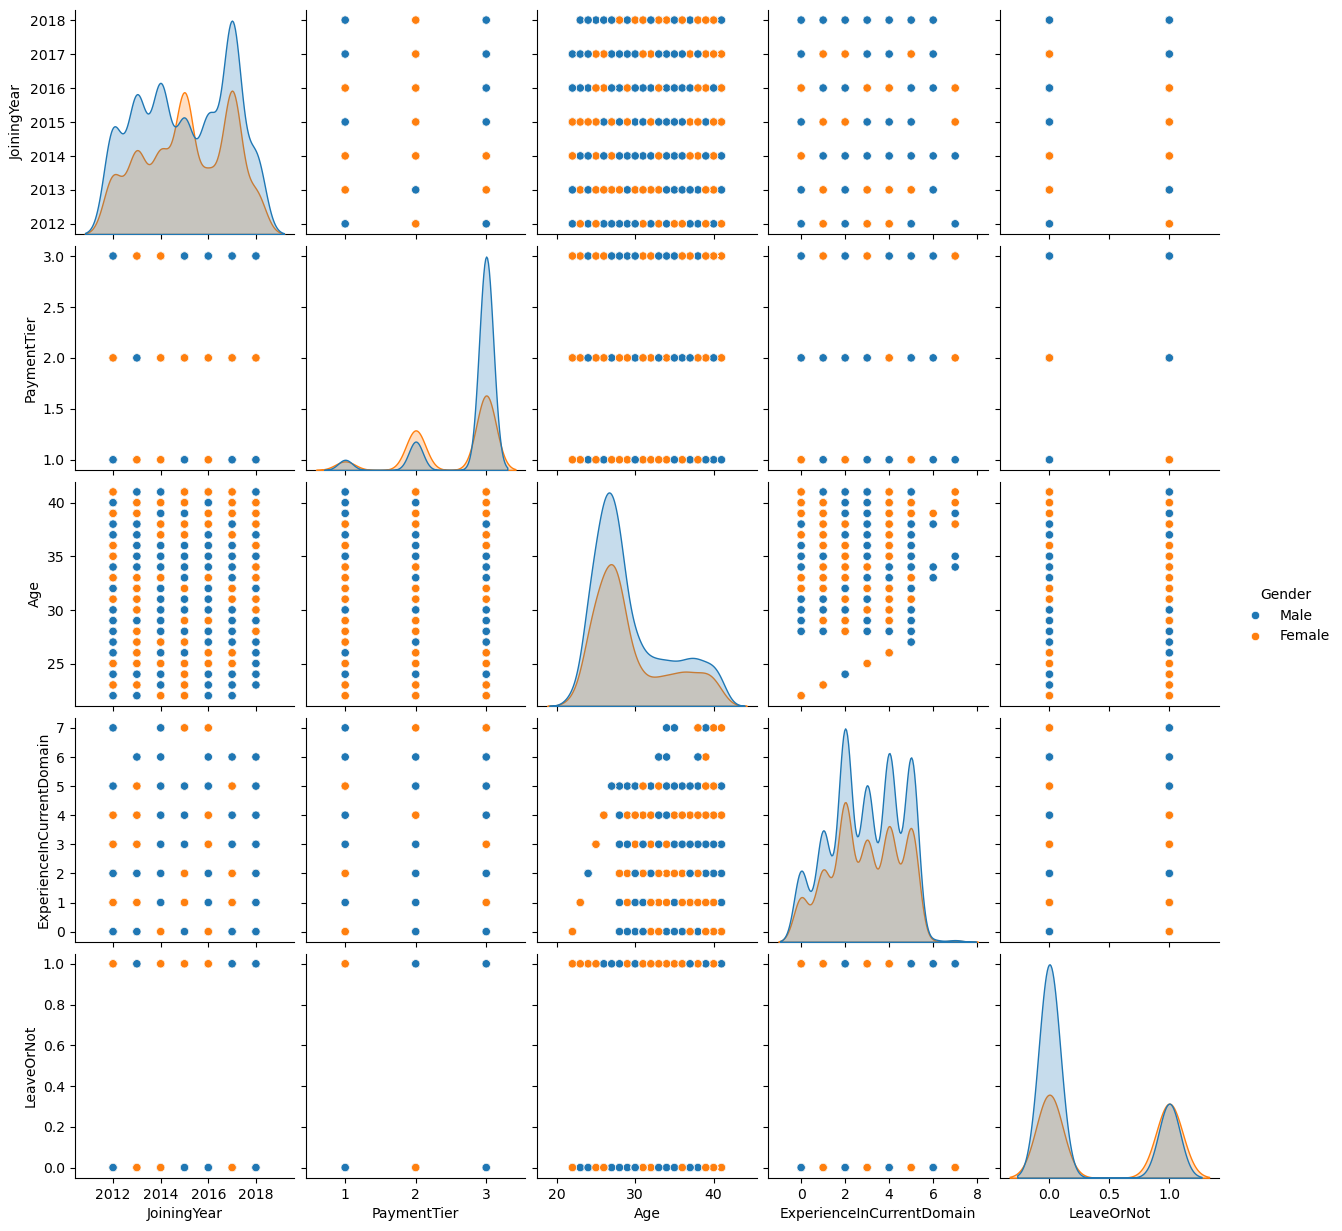

In [20]:
# Pairplot for Numerical Variables
sns.pairplot(df, hue='Gender')
plt.show()


Numerical Columns:
['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']


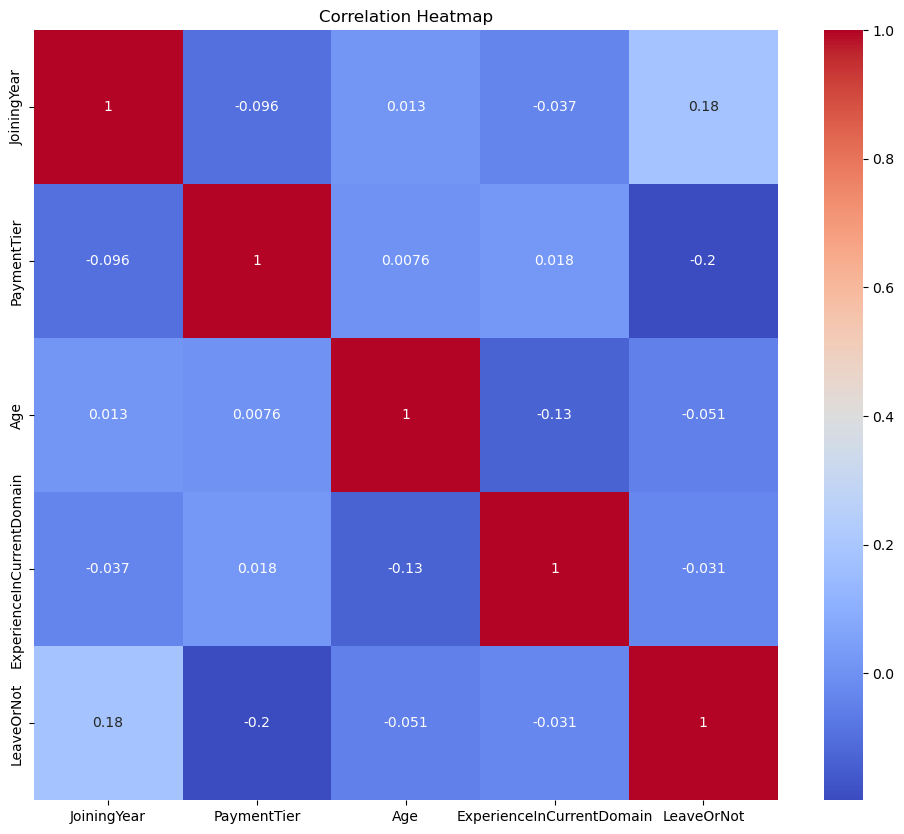

In [21]:
# Selecting only numerical columns from the DataFrame (df)
numeric_column = df.select_dtypes(include='number')

# Displaying the list of numerical columns
print("Numerical Columns:")
print(numeric_column.columns.tolist())

# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = numeric_column.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


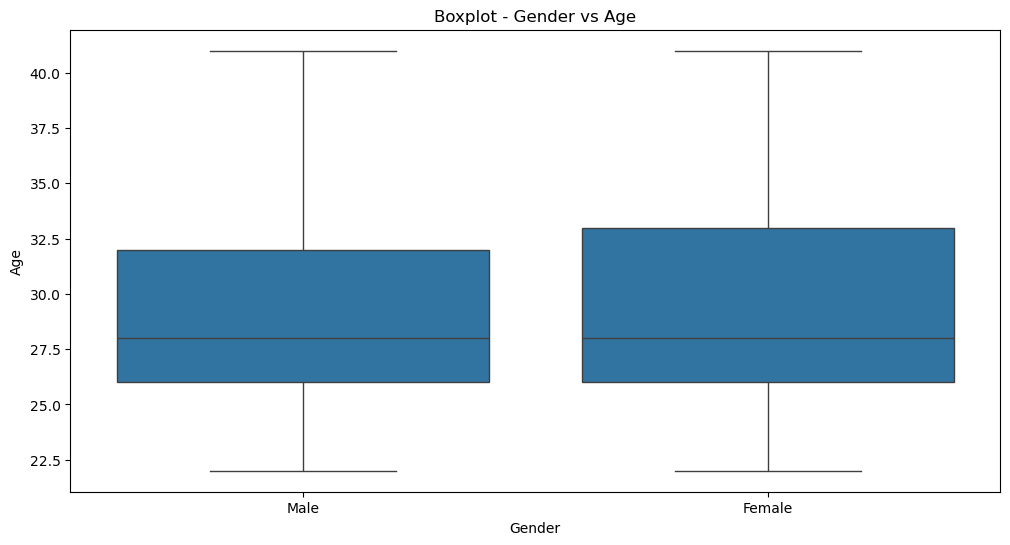

In [22]:
# Boxplot - Gender vs Age
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Boxplot - Gender vs Age')
plt.show()

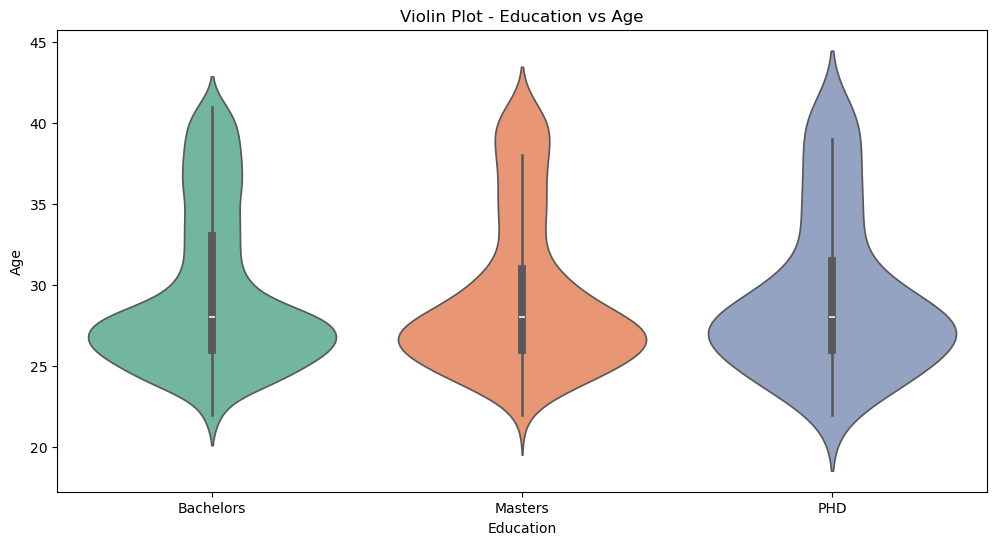

In [23]:
# Violin Plot - Education vs Age
plt.figure(figsize=(12,6))
sns.violinplot(x='Education', y='Age', data=df, palette='Set2')
plt.title('Violin Plot - Education vs Age')
plt.show()


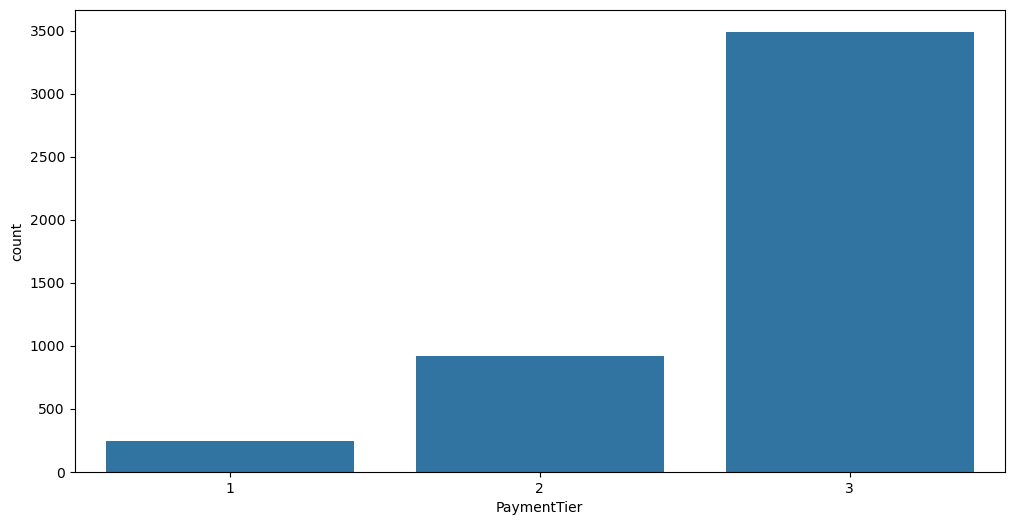

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentTier', data = df)
plt.show()

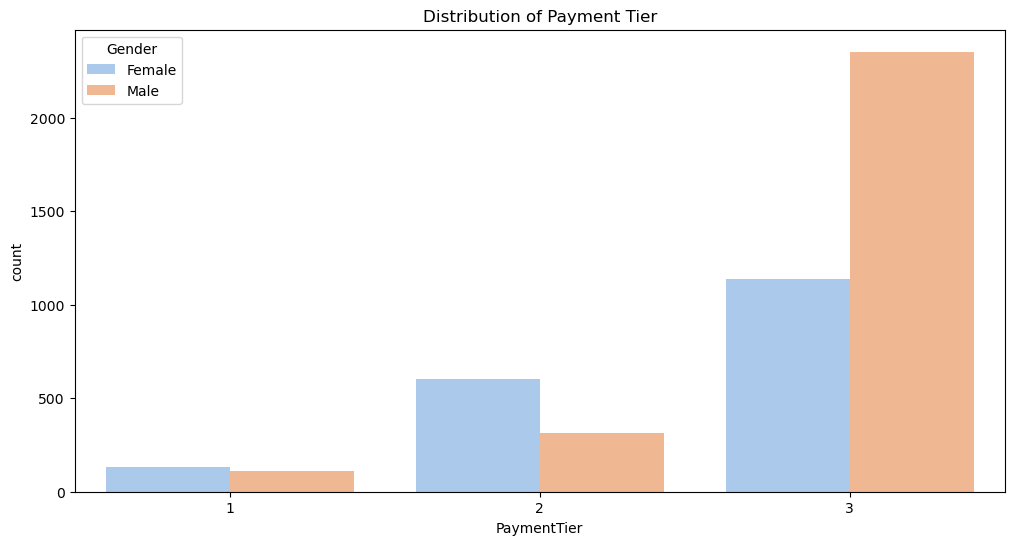

In [25]:

# Count Plot - Payment Tier
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentTier', data=df, palette='pastel',hue='Gender')
plt.title('Distribution of Payment Tier')
plt.show()

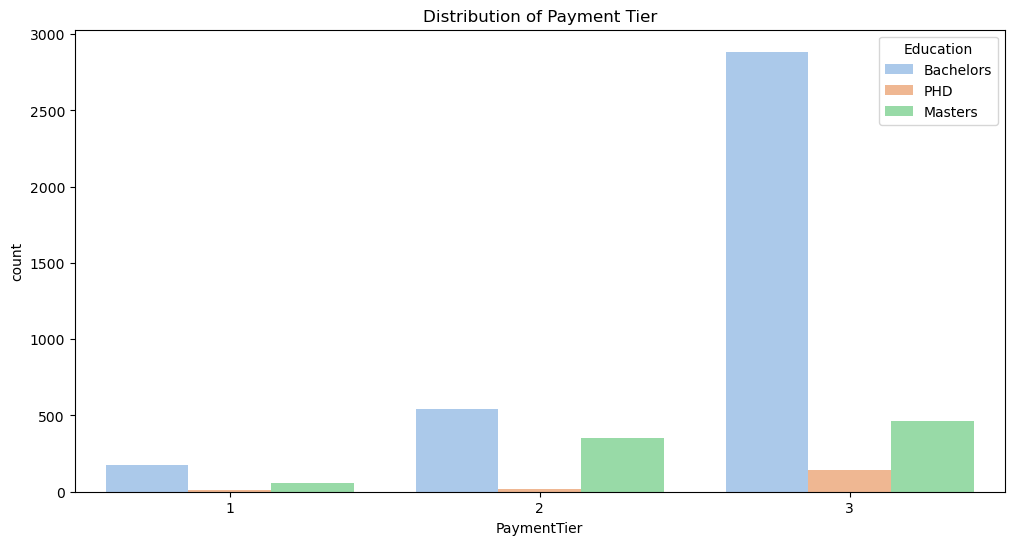

In [26]:
# Count Plot - Payment Tier
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentTier', data=df, palette='pastel',hue="Education")
plt.title('Distribution of Payment Tier')
plt.show()

## 10.Feature Engineering

##### Label Encoding

In [27]:
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder

# Encode categorical features 
for feature in categorical_features:
    label_encoder  = LabelEncoder()
    df[feature] =label_encoder .fit_transform(df[feature])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


##### Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Creating a MinMaxScaler Object (Scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting and Transforming the Data (MinMax Scaling)
df_scaled = scaler.fit_transform(df[columns])

# Converting Scaled Data Back to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columns)

# Replacing the Original Columns with Scaled Values
df[columns] = scaled_df

# Displaying the Scaled DataFrame
df


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,0.833333,0.0,1.0,0.631579,1.0,0.0,0.000000,0.0
1,0.0,0.166667,1.0,0.0,0.315789,0.0,0.0,0.428571,1.0
2,0.0,0.333333,0.5,1.0,0.842105,0.0,0.0,0.285714,0.0
3,0.5,0.666667,0.0,1.0,0.263158,1.0,0.0,0.714286,1.0
4,0.5,0.833333,1.0,1.0,0.105263,1.0,1.0,0.285714,1.0
...,...,...,...,...,...,...,...,...,...
4648,0.0,0.166667,0.0,1.0,0.210526,0.0,0.0,0.571429,0.0
4649,0.5,0.166667,1.0,0.5,0.789474,1.0,0.0,0.285714,1.0
4650,0.5,1.000000,0.5,1.0,0.263158,1.0,0.0,0.714286,1.0
4651,0.0,0.000000,0.0,1.0,0.421053,1.0,1.0,0.285714,0.0


## 11.Data Splitting

In [29]:
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=35, test_size=0.3)

## 12.Model Selection,Model Training & Model Evaluation

In [31]:
# Import Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Initialize Lists to Store Results
model_name = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []

# List of Classification Models (optimized settings)
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),  # Avoid SAMME.R warning
    SVC(),
    MLPClassifier(max_iter=1000),  # More iterations for convergence
    XGBClassifier(eval_metric='logloss')  # Removed deprecated use_label_encoder
]

# Training and Evaluating Each Model
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    # Append model name and metrics
    model_name.append(model.__class__.__name__)
    Accuracy.append(accuracy_score(y_test, prediction))
    Precision.append(precision_score(y_test, prediction, average='weighted', zero_division=0))
    Recall.append(recall_score(y_test, prediction, average='weighted', zero_division=0))
    F1_Score.append(f1_score(y_test, prediction, average='weighted', zero_division=0))

# Create and display the result DataFrame
results_df = pd.DataFrame({
    "Model": model_name,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "F1_Score": F1_Score
})

# Sort by Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Classification Model Performance Comparison:")
results_df


Classification Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1_Score
0,MLPClassifier,0.842407,0.850064,0.842407,0.835483
1,XGBClassifier,0.837393,0.840168,0.837393,0.831980
2,GradientBoostingClassifier,0.834527,0.844712,0.834527,0.826040
3,RandomForestClassifier,0.827364,0.827644,0.827364,0.822608
4,DecisionTreeClassifier,0.813037,0.810956,0.813037,0.809700
5,SVC,0.805874,0.829078,0.805874,0.789578
6,ExtraTreeClassifier,0.803725,0.801607,0.803725,0.799304
7,AdaBoostClassifier,0.796562,0.804150,0.796562,0.784524
8,LogisticRegression,0.695559,0.688743,0.695559,0.666352


##   13.Result

##### - The age distribution showed most employees are between 25–35 years old.
##### - Gender distribution revealed a slight male dominance in the organization.


## 14.Conclusion

##### The analysis successfully demonstrated how basic visualizations can provide valuable insights into employee demographics. Understanding the distribution of age and gender helps organizations assess workforce diversity and plan for future hiring or training initiatives. These findings can serve as a foundation for more advanced HR analytics, such as attrition prediction or diversity impact assessments.